In [2]:
import os
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict




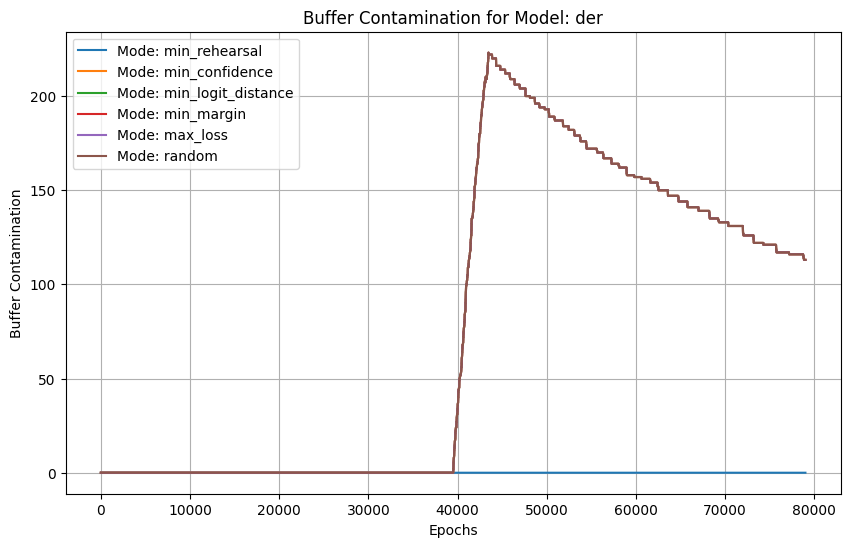

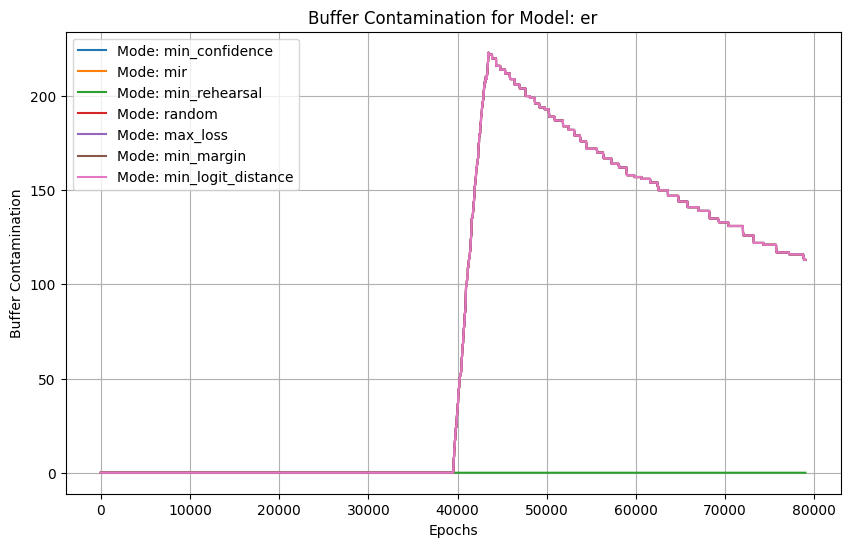

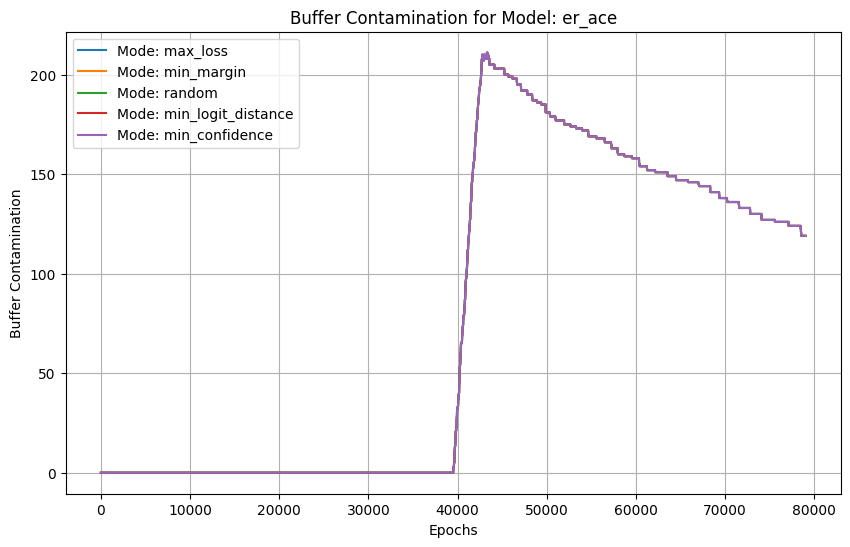

In [3]:
# Target directory
log_dir = "."

# Data structure: stores {model: {buffer_retrieve_mode: [buffer_contamination values]}}
data = defaultdict(lambda: defaultdict(list))

# Iterate over log files
for filename in os.listdir(log_dir):
    if filename.endswith(".json"):
        # Extract model and buffer_retrieve_mode information
        match = re.search(r"-(?P<model>[^-]+)-buf-\d+-severity-\d+-ret_mode-(?P<buffer_mode>[^-]+)", filename)
        if match:
            model = match.group("model")
            buffer_mode = match.group("buffer_mode")
            
            # Read the log file
            with open(os.path.join(log_dir, filename), "r") as f:
                log_data = json.load(f)
                if "buffer_contamination" in log_data:
                    # Add buffer_contamination values to the data structure
                    data[model][buffer_mode].append(log_data["buffer_contamination"])

# Plot line graphs
for model, buffer_modes in data.items():
    plt.figure(figsize=(10, 6))
    for buffer_mode, contamination_values in buffer_modes.items():
        # If there are multiple sets of contamination_values, take the average or smooth the data
        avg_values = [sum(c) / len(c) for c in zip(*contamination_values)] if len(contamination_values) > 1 else contamination_values[0]
        plt.plot(avg_values, label=f"Mode: {buffer_mode}")
    
    # Add legend and title
    plt.title(f"Buffer Contamination for Model: {model}")
    plt.xlabel("Epochs")
    plt.ylabel("Buffer Contamination")
    plt.legend()
    plt.grid(True)
    
    # Save the plot
    output_path = os.path.join(log_dir, f"{model}_buffer_contamination_plot.png")
    plt.savefig(output_path)
    plt.show()

In [4]:
# Print the keys of data['der']
print(data['er'].keys())




dict_keys(['min_confidence', 'mir', 'min_rehearsal', 'random', 'max_loss', 'min_margin', 'min_logit_distance'])


In [5]:
print(data['er'].keys())

dict_keys(['min_confidence', 'mir', 'min_rehearsal', 'random', 'max_loss', 'min_margin', 'min_logit_distance'])


In [6]:
print(data['er']['mir'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
## ER cil end accuracy
min_confidence = [24.2, 27.800000000000004, 14.6, 25.6, 37.4, 18.6, 11.600000000000001, 15.8, 25.0, 24.6, 12.4, 22.8, 26.200000000000003, 23.599999999999998, 18.2, 31.2, 33.0, 41.4, 40.0, 89.4]
max_loss = [27.200000000000003, 41.4, 20.599999999999998, 29.799999999999997, 48.199999999999996, 17.8, 13.4, 21.6, 29.599999999999998, 26.6, 19.2, 31.4, 29.799999999999997, 33.4, 24.6, 44.4, 32.0, 45.6, 52.400000000000006, 83.8]
min_logit_distance  = [19.0, 23.200000000000003, 12.4, 20.0, 35.0, 15.2, 6.6000000000000005, 10.2, 17.4, 21.4, 18.2, 17.599999999999998, 14.6, 11.799999999999999, 4.3999999999999995, 13.600000000000001, 13.0, 9.0, 7.6, 86.8]
min_margin = [34.599999999999994, 41.4, 25.0, 31.8, 47.0, 22.0, 15.2, 27.0, 28.599999999999998, 33.2, 24.4, 30.8, 32.2, 37.2, 28.000000000000004, 40.2, 37.8, 48.199999999999996, 51.0, 84.0]
mir = [36.6, 42.199999999999996, 21.8, 38.0, 55.00000000000001, 23.599999999999998, 20.0, 27.6, 32.800000000000004, 38.2, 24.8, 31.6, 39.4, 37.6, 28.000000000000004, 43.6, 41.199999999999996, 53.0, 51.800000000000004, 85.2]
random = [33.2, 41.6, 24.2, 33.800000000000004, 48.4, 27.6, 22.400000000000002, 31.8, 34.4, 34.0, 23.799999999999997, 38.6, 41.0, 40.6, 31.6, 43.4, 44.800000000000004, 56.00000000000001, 55.2, 90.2]

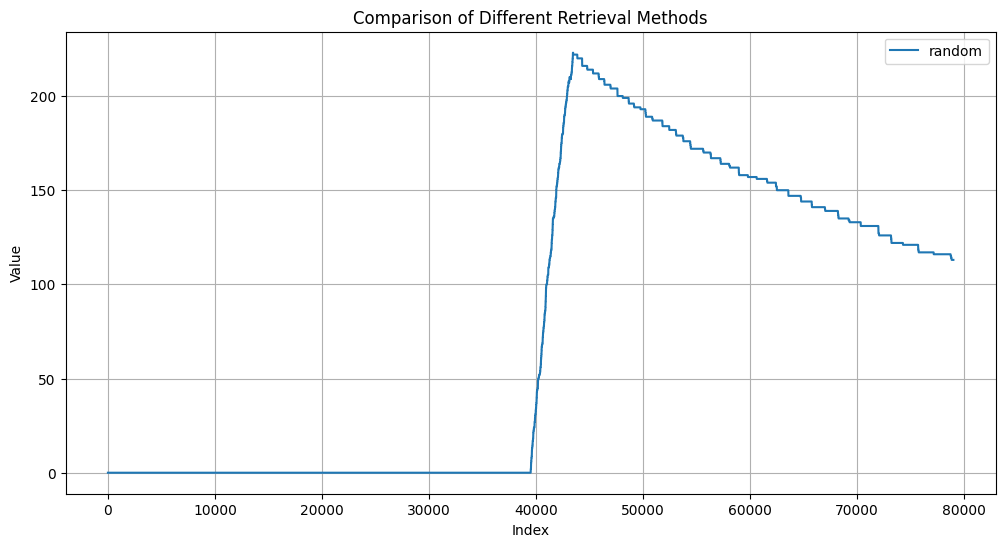

In [12]:
keys = list(data['er'].keys())
values = {key: data['er'][key][0] for key in keys}

# Create the plot
plt.figure(figsize=(12, 6))

# Iterate over keys and plot each list
# keys = ['min_confidence', 'mir', 'min_rehearsal', 'random', 'max_loss', 'min_margin', 'min_logit_distance']
keys = ['mir', 'random']
keys = ['random']
for key in keys:
    plt.plot(values[key], label=key)

# Add plot details
plt.title("Comparison of Different Retrieval Methods")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()